#### We apply the lightgbm model to classify the bookingID on the validation or holdout set
### Please make sure that you have the "modeling_toolbox.py" file in this prediction folder

In [1]:
## coding=utf-8
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.calibration import calibration_curve
from sklearn.externals import joblib

from modeling_toolbox import model_evaluation

pd.set_option('display.width', 3000)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 210)

#### Import model and features selected

In [2]:
id_col = 'bookingID'
target_variable = 'label'

#import the names of columns which are useful for prediction
feature_cols_filter = joblib.load('../02_prediction/models/feature_cols_lgb_model.pkl')
useful_cols = [id_col]+feature_cols_filter+[target_variable]

#load model
clf = joblib.load('../02_prediction/models/lgb_model.pkl')

### Import Validation or Holdout Set
### Please choose wich dataset you want to use to make the prediction
### 1 : validation set (created to validate the training)
### 2 : holdout data set (Grab only)

In [3]:
dataset = {1: 'df_xgb_valid.parquet', 2: 'holdout_xgb.parquet'}

### Choose Here #########
dataset_name = dataset[1]
### Choose Here #########

In [4]:
df = pd.read_parquet('../data/3-ml_datasets/'+dataset_name)
df = df[useful_cols].copy()

df.head()

,bookingID,Accuracy_count,Accuracy_mean,Accuracy_std,Accuracy_sum,Accuracy_median,Accuracy_max,Bearing_std,Bearing_sum,Bearing_min,Bearing_median,Bearing_max,acceleration_x_std,acceleration_x_sum,acceleration_x_min,acceleration_x_max,acceleration_y_std,acceleration_y_sum,acceleration_y_median,acceleration_y_max,acceleration_z_std,acceleration_z_sum,acceleration_z_min,acceleration_z_max,gyro_x_mean,gyro_x_std,gyro_x_sum,gyro_x_min,gyro_y_mean,gyro_y_std,gyro_y_median,gyro_y_max,gyro_z_mean,gyro_z_sum,gyro_z_median,Speed_mean,Speed_std,Speed_sum,Speed_median,Speed_max,harsh_acceleration_y_mean,harsh_acceleration_y_std,harsh_acceleration_y_sum,harsh_acceleration_z_std,d_gyro_x-1_count,d_gyro_x-1_mean,d_gyro_x-1_sum,d_gyro_x-1_min,d_gyro_x-1_median,d_gyro_x-1_max,d_gyro_x-2_count,d_gyro_x-2_mean,d_gyro_x-2_sum,d_gyro_x-2_median,d_gyro_x-3_count,d_gyro_x-3_mean,d_gyro_x-3_sum,d_gyro_x-4_count,d_gyro_x-4_sum,d_gyro_x-4_median,d_gyro_x-4_max,d_gyro_x-5_count,d_gyro_x-5_mean,d_gyro_x-5_std,d_gyro_x-5_sum,d_gyro_x-5_min,d_gyro_x-5_median,d_gyro_x-5_max,d_gyro_y-1_sum,d_gyro_y-1_min,d_gyro_y-1_median,d_gyro_y-2_mean,d_gyro_y-2_sum,d_gyro_y-2_min,d_gyro_y-2_median,d_gyro_y-2_max,d_gyro_y-3_mean,d_gyro_y-3_sum,d_gyro_y-3_min,d_gyro_y-3_median,d_gyro_y-4_mean,d_gyro_y-4_std,d_gyro_y-4_sum,d_gyro_y-4_min,d_gyro_y-4_median,d_gyro_y-5_mean,d_gyro_y-5_sum,d_gyro_y-5_min,d_gyro_y-5_median,d_gyro_y-5_max,d_gyro_z-1_mean,d_gyro_z-1_sum,d_gyro_z-1_min,d_gyro_z-1_median,d_gyro_z-2_mean,d_gyro_z-2_std,d_gyro_z-2_sum,d_gyro_z-2_median,d_gyro_z-3_mean,d_gyro_z-3_sum,d_gyro_z-3_median,d_gyro_z-4_mean,d_gyro_z-4_sum,d_gyro_z-4_median,d_gyro_z-4_max,...,"gyro_z__fft_coefficient__coeff_84__attr_""angle""","gyro_z__fft_coefficient__coeff_84__attr_""imag""","gyro_z__fft_coefficient__coeff_84__attr_""real""","gyro_z__fft_coefficient__coeff_85__attr_""abs""","gyro_z__fft_coefficient__coeff_85__attr_""imag""","gyro_z__fft_coefficient__coeff_85__attr_""real""","gyro_z__fft_coefficient__coeff_86__attr_""abs""","gyro_z__fft_coefficient__coeff_86__attr_""angle""","gyro_z__fft_coefficient__coeff_86__attr_""imag""","gyro_z__fft_coefficient__coeff_86__attr_""real""","gyro_z__fft_coefficient__coeff_87__attr_""abs""","gyro_z__fft_coefficient__coeff_87__attr_""angle""","gyro_z__fft_coefficient__coeff_87__attr_""imag""","gyro_z__fft_coefficient__coeff_88__attr_""abs""","gyro_z__fft_coefficient__coeff_88__attr_""angle""","gyro_z__fft_coefficient__coeff_88__attr_""imag""","gyro_z__fft_coefficient__coeff_88__attr_""real""","gyro_z__fft_coefficient__coeff_89__attr_""abs""","gyro_z__fft_coefficient__coeff_89__attr_""angle""","gyro_z__fft_coefficient__coeff_89__attr_""imag""","gyro_z__fft_coefficient__coeff_89__attr_""real""","gyro_z__fft_coefficient__coeff_8__attr_""abs""","gyro_z__fft_coefficient__coeff_8__attr_""angle""","gyro_z__fft_coefficient__coeff_8__attr_""imag""","gyro_z__fft_coefficient__coeff_8__attr_""real""","gyro_z__fft_coefficient__coeff_90__attr_""angle""","gyro_z__fft_coefficient__coeff_90__attr_""imag""","gyro_z__fft_coefficient__coeff_91__attr_""abs""","gyro_z__fft_coefficient__coeff_91__attr_""angle""","gyro_z__fft_coefficient__coeff_91__attr_""imag""","gyro_z__fft_coefficient__coeff_91__attr_""real""","gyro_z__fft_coefficient__coeff_92__attr_""abs""","gyro_z__fft_coefficient__coeff_92__attr_""angle""","gyro_z__fft_coefficient__coeff_92__attr_""imag""","gyro_z__fft_coefficient__coeff_92__attr_""real""","gyro_z__fft_coefficient__coeff_93__attr_""abs""","gyro_z__fft_coefficient__coeff_93__attr_""angle""","gyro_z__fft_coefficient__coeff_93__attr_""imag""","gyro_z__fft_coefficient__coeff_93__attr_""real""","gyro_z__fft_coefficient__coeff_94__attr_""angle""","gyro_z__fft_coefficient__coeff_94__attr_""imag""","gyro_z__fft_coefficient__coeff_94__attr_""real""","gyro_z__fft_coefficient__coeff_95__attr_""abs""","gyro_z__fft_coefficient__coeff_95__attr_""angle""","gyro_z__fft_coefficient__coeff_95__attr_""imag""","gyro_z__fft_coefficient__coeff_95__attr_""real""","g

### Performance of the model with never seen data

Target rate is : 25.00 %
evaluation started
AUC: 0.740135, lift at 10 percent: 2.630000


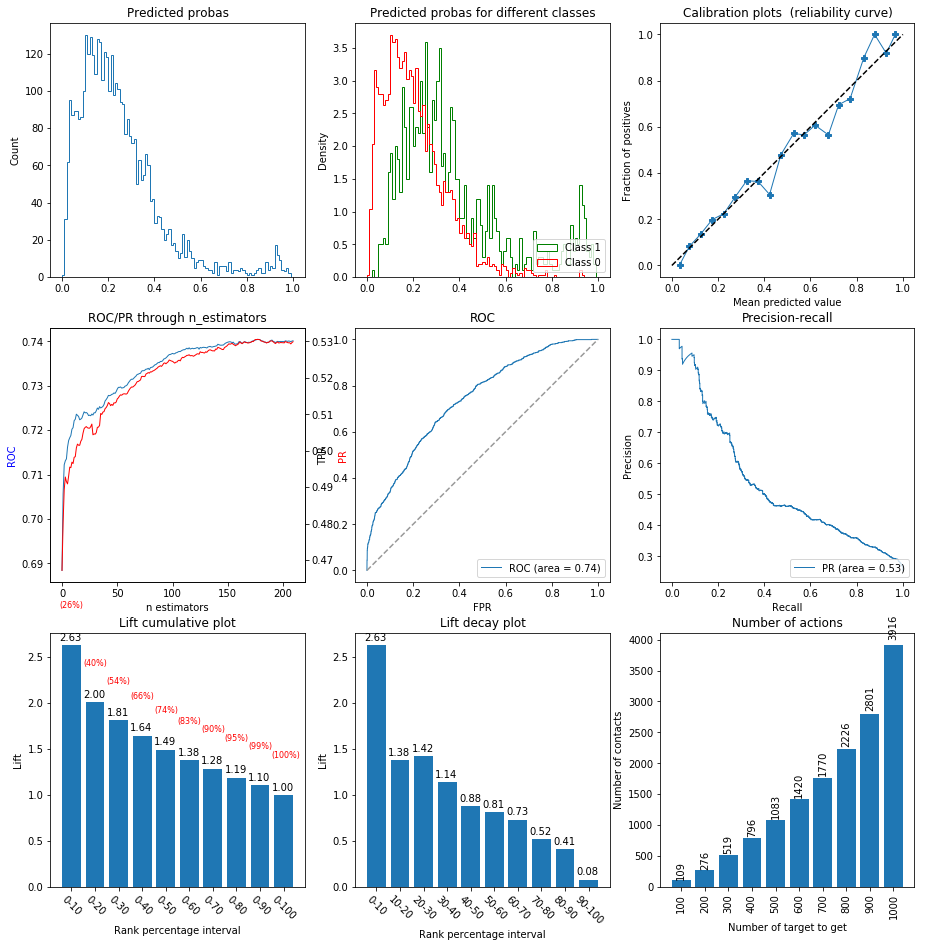

<Figure size 432x288 with 0 Axes>

In [5]:
prevalence = df[target_variable].mean()*100
print("Target rate is : %.2f %%" %prevalence)
results = model_evaluation(df, clf, feature_cols_filter, id_col, target_variable, 'prob_1', _ntree_limit=0)